In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

plt.style.available
plt.style.use('default')

In [33]:
def graph(path):
    # Los Alamos death quantile projections
    # https://covid-19.bsvgateway.org
    death_quantiles = pd.read_csv(path, parse_dates = ['dates'], index_col = 'dates')
    deaths_per_state = pd.pivot_table(death_quantiles, index='dates', values=['q.05', 'q.50', 'q.95'], columns='simple_state', aggfunc=np.sum)
    
    deaths = pd.DataFrame({
        'p95': deaths_per_state['q.95'].sum(axis=1).diff(),
        'p50': deaths_per_state['q.50'].sum(axis=1).diff()
    })

    ax = deaths.plot(
        title="Los Alamos Death Percentiles",
        figsize=(20,10),
        grid=True,
    )
    ax.yaxis.set_ticks(np.arange(0, 5000, 200))
    ax.set_xlabel("date")
    ax.set_ylabel("deaths")

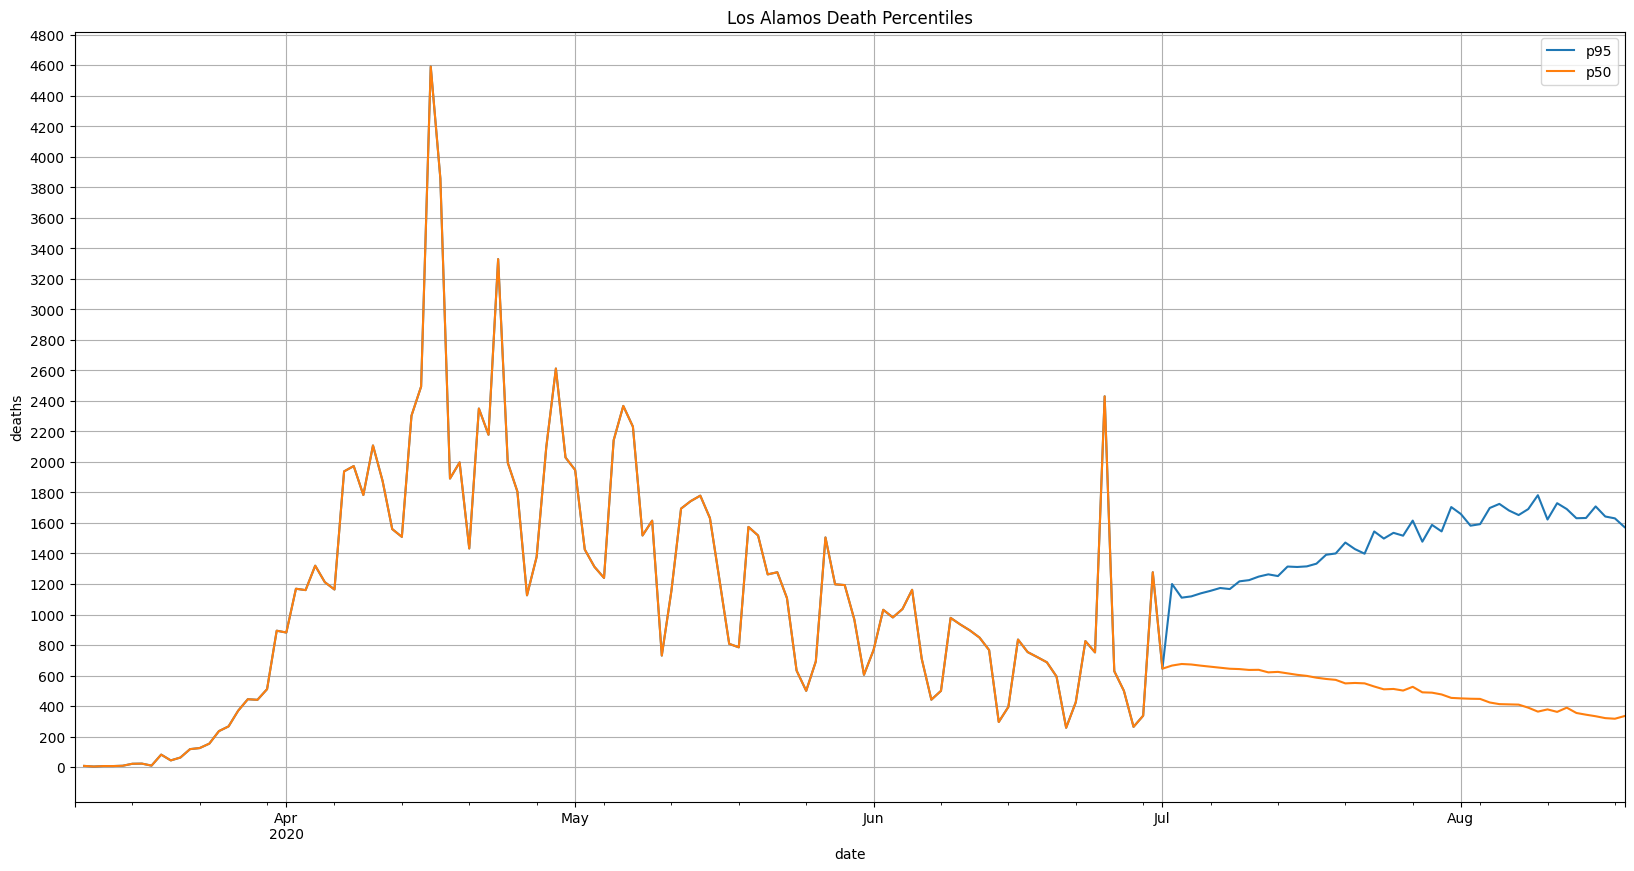

In [34]:
# Los Alamos death quantile projections
# https://covid-19.bsvgateway.org
graph("2020-07-01_deaths_quantiles_us_website.csv")

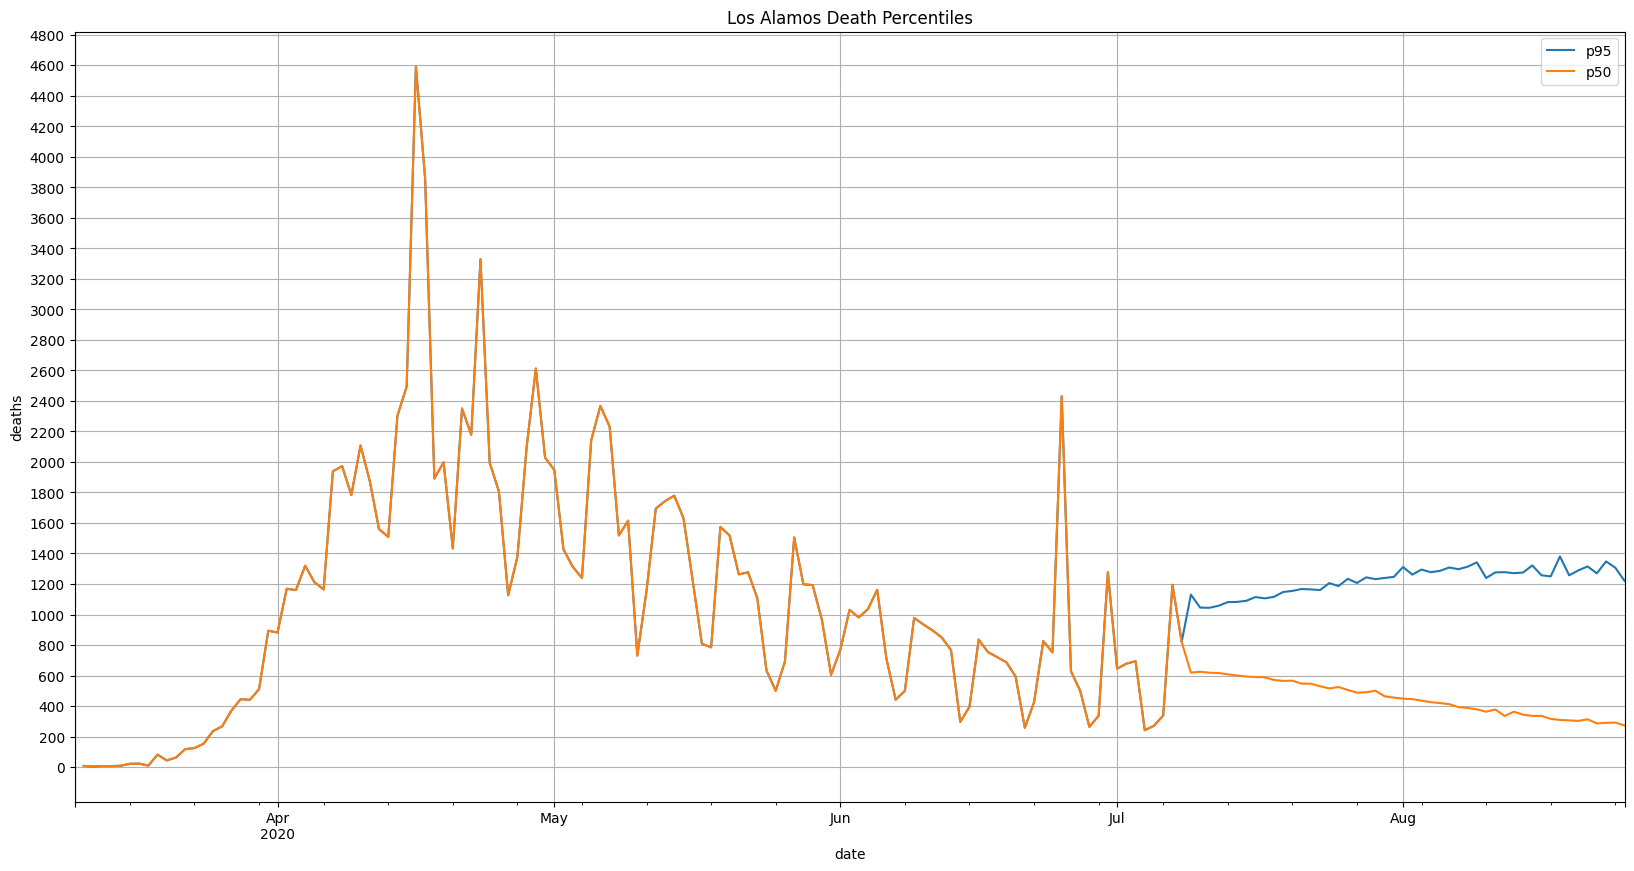

In [35]:
graph("2020-07-08_deaths_quantiles_us_website.csv")

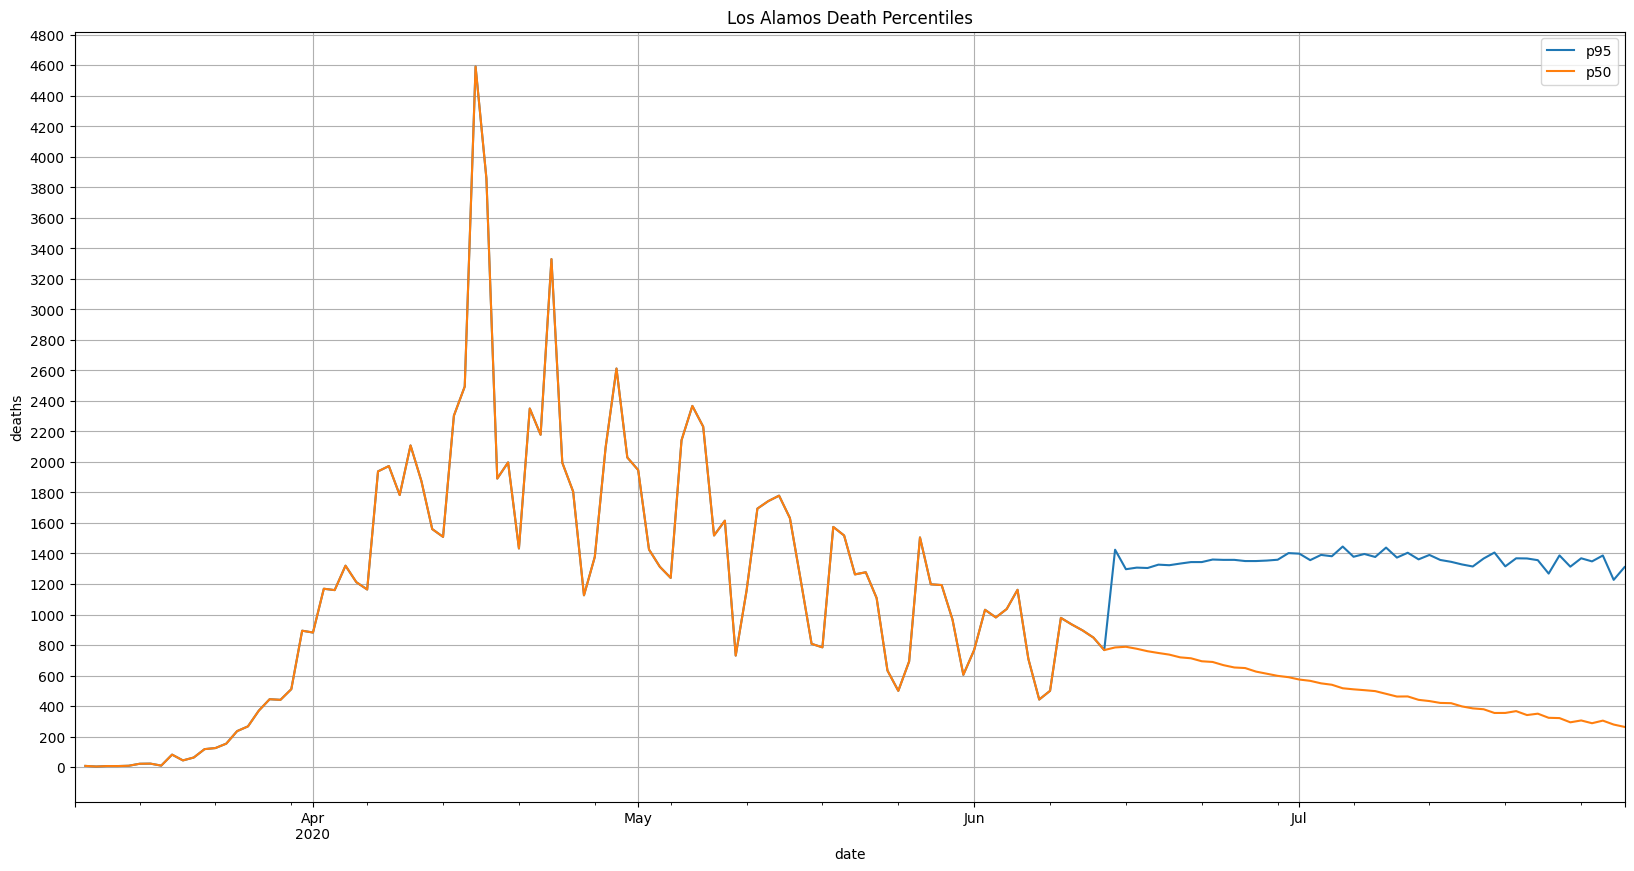

In [30]:
graph("2020-06-13_deaths_quantiles_us_website.csv")